In this project,  I am building a model to predict house prices and trying to achieve the best efficiency possible through various approaches.

About the Dataset:

I have taken this dataset from Kaggle. This dataset contains 21613 observations and 21 variables. These features include number of bedrooms and bathrooms, squire feet of living area, number of floors, squire feet of basement and many other important factors. Here, the target variable is the price.

### Exploratory Data Analysis(EDA):

It is the first step in our project, which includes gaathering the data, then observing the data, finding null values if any and rectifying the data, making it meaningful for prediction.
 

In [1]:
## Normalize the data 

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
# importing the data 
data= pd.read_csv('E:\\edubridge\\house_dataset.csv')

In [3]:
# seeing the first 5 rows of the data
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# seeing the last 5 rows of the data
data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [5]:
# seeing the names of column in the data
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
# checking the dimensions of data
data.shape

(21613, 21)

In [7]:
# checking the various parameters of data
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
# checking the continuity of data
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [9]:
# To check null values
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

As there are no null values in this dataset, that means it is clean and requires no other modification steps.

### Visualization:
In this stage, we will try to analyse if there is any hidden patterns between the variables of our data through graphs.

+ In graph 1, we can see that the count of houses with 3 bedrooms is the highest, followed by 4 and then 2 bedrooms. This means that builders are building houses with 3 bedrooms, the most as they are sold more as compared to the rest in the market.
+ In graph 2, we can observe that the price of the houses with bathrooms in the range from 1 to 5, does not fluctuate much and remain in the price bracket of 0 to 3, while there are some outliers.
+ In graph 3, we can analyse that even if the number of bathrooms are same in houses, there prices vary much because of other factors, and hence there is no clear relation between price and the number of bedrooms.
+ In graph 4, we can clearly see that the price of those houses are much higher then their counterparts with squire feet lot but are having a water front.
+ In graph 5, we can clearly observe that there is a linear relation between squire feet of living area and price, as area is increasing, the price is also increasing steadily.


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

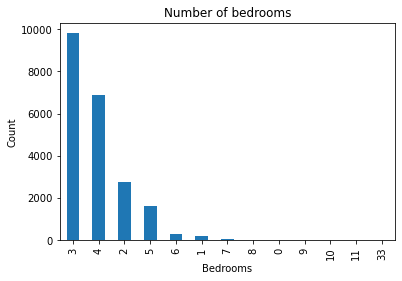

In [10]:
# Graph 1

data['bedrooms'].value_counts().plot(kind = 'bar')
plt.title('Number of bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

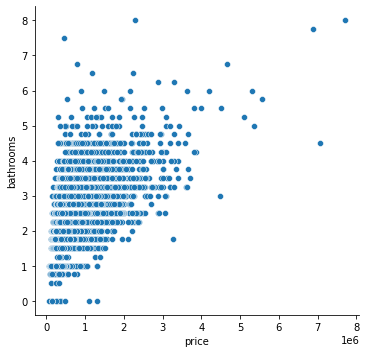

In [11]:
# Graph 2
sns.relplot(x = 'price', y = 'bathrooms', data = data)

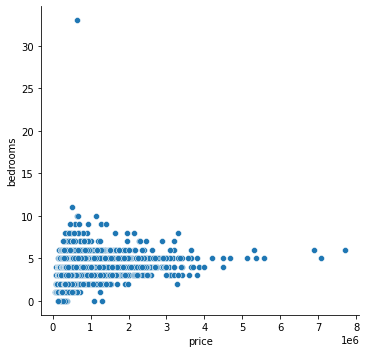

In [12]:
# Graph 3
sns.relplot(x = 'price', y = 'bedrooms', data = data)

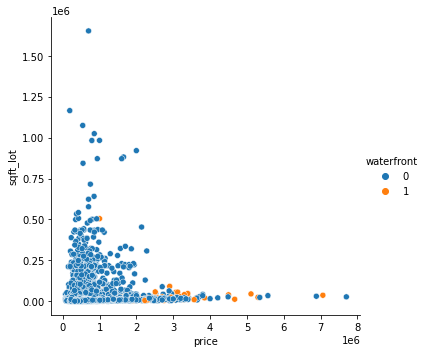

In [13]:
# Graph 4
sns.relplot(x = 'price', y = 'sqft_lot', hue ='waterfront', data = data)

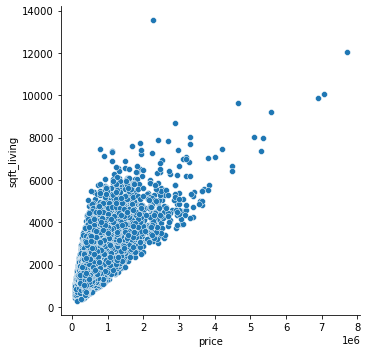

In [14]:
# Graph 5
sns.relplot(x = 'price', y = 'sqft_living', data = data)

+ For better visualization, I am normalizing my price column and then plotting it using matplotlib.

In [15]:
from scipy.stats import norm
from scipy import stats
data['price'] = np.log(data['price'])


C:\Users\a\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

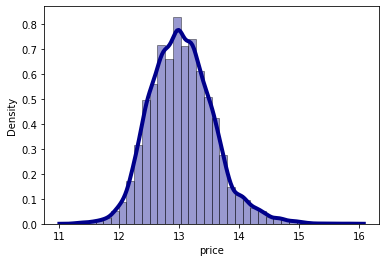

In [16]:
sns.distplot(data['price'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})



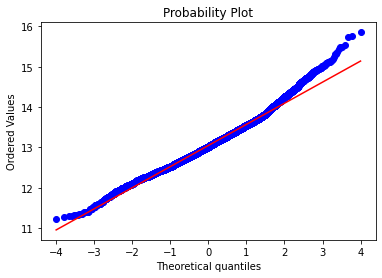

In [17]:
res = stats.probplot(data['price'], plot=plt)

In [18]:
print(data.price.skew())
print(data.price.kurt())

0.42807247557592526
0.691853952835281


From the above figure and values, we can say that - 
+ Peakedness of graph is more than normal distribution.
+ This data is not symmetric and is positively skewed.

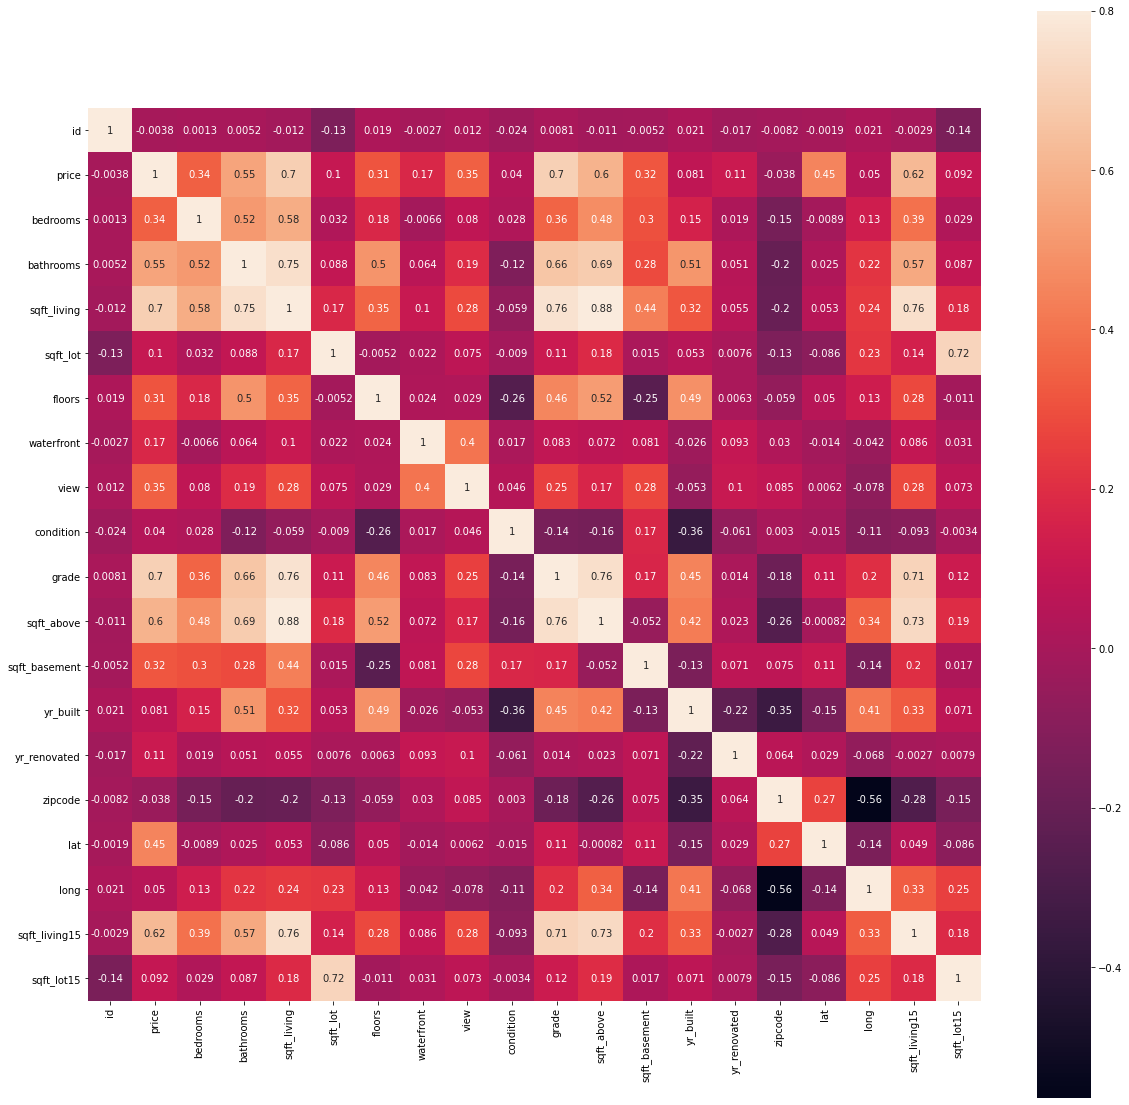

In [19]:
#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

From, the above figure, we can see that features like sqft_living, grade, sqft_living15 have the highest correlation with my target variable price whereas, zipcode and id has the lowest.

### Modelling:

Firstly, I have dropped 3 columns in the training dataset, which I thought was unnecessary. These are id, date and price. Now, as I am predicting price, so my test variable is price. 
Secondly, I am using 2 different types of Machine Learning Algorithms namely Linear Regression, and Random Forest, to find which gives better accuracy after modelling.

linear Regression: Linear regression algorithm shows a linear relationship between a dependent (y) and one or more independent (y) variables, hence called as linear regression. Since linear regression shows the linear relationship, which means it finds how the value of the dependent variable is changing according to the value of the independent variable.

Random Forest: It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model. Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.

Support Vector Machine: The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points. To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes.

### Linear Regression Model


In [20]:
# Model 1
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train = data.drop(['id','date','price'],axis = 1)
test = data['price']

scaler.fit(train)
N_train = scaler.transform(train)

x_train, x_test, y_train, y_test = train_test_split(N_train, test, test_size = 0.3, random_state = 1)

regr = LinearRegression()

regr.fit(x_train, y_train)

pred = regr.predict(x_test)

pred



array([13.19172419, 13.0004896 , 13.47668207, ..., 12.65617121,
       15.03734339, 13.07628382])

In [21]:
# To check efficiency
y = int(round(regr.score(x_test, y_test)*100))
print('Accuracy = ', y)

Accuracy =  77


### Random Forest Model

In [22]:
# Model 2
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(random_state=1, n_estimators = 100, max_depth=10)

forest_model.fit(x_train, y_train)

melb_preds = forest_model.predict(x_test)

melb_preds

array([13.02779387, 12.8850915 , 13.36732171, ..., 12.76911966,
       14.48742457, 13.30212828])

In [23]:
z = int(round(forest_model.score(x_test, y_test)*100))
print('Accuracy = ', z)

Accuracy =  88


### Support Vector Machine Model

In [24]:
# SVM
# Model 3
from sklearn import svm

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

clf = svm.SVR(kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)


In [25]:
zz = int(round(clf.score(x_test, y_test)*100))
print('Accuracy = ', zz)

Accuracy =  77


### Hyperparameter Tuning:

In [30]:
# For SVM
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(svm.SVR(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(x_train, y_train) 

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.842, total=   4.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.844, total=   4.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.6s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.834, total=   4.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.836, total=   4.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.831, total=   5.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.779, total=   4.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.785, total=   5.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.768, total=   5.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.774, total=   5.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.785, total=   7.9s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.793, total=   7.4s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.775, total=   7.3s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.780, total=   8.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.778, total=   7.5s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.765, total=   7.3s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.773, total=   7.4s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 19.5min finished


GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [31]:
grid_predictions = grid.predict(x_test)
tun = int(round(grid.score(x_test, y_test)*100))
print('Accuracy = ', tun)

Accuracy =  88


### Conclusion:

From the above observations, we can see that these 3 algorithms perform differently and there respective score also differs.

+ For Linear Regression, the accuracy is 77%.
+ For Random Forest, the accuracy is 88%.
+ For Support Vector Machine, the accuracy is 77%.
+ After Tuning the SVM, the accuracy is 88%.

Hence between these 3 models, the Random forest performed the best and after tuning, SVM performed similar.